In [78]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [51]:
'''
Preprocessing
'''

def str_to_df(row):
    return row.split(";")

def convert(df, col_name):
    df[col_name] = df[col_name].astype('float')

red = pd.read_csv("winequality-red.csv")

cols = str_to_df('fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"')


red_rows = red['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].apply(str_to_df)

data = list(red_rows)

for i in range(len(cols)):
    cols[i] = cols[i].replace('"', '')
    cols[i] = cols[i].replace(' ', '_')
    
df_red = pd.DataFrame(data, columns = cols)
    
for col in cols[:-1]:
    convert(df_red, col)
    
df_red['quality'] = df_red['quality'].astype('int64')
df_red["type"] = np.ones(red.shape[0])


In [52]:
white = pd.read_csv("winequality-white.csv")

cols = str_to_df('fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"')


white_rows = white['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].apply(str_to_df)

data = list(white_rows)

for i in range(len(cols)):
    cols[i] = cols[i].replace('"', '')
    cols[i] = cols[i].replace(' ', '_')
    
df_white = pd.DataFrame(data, columns = cols)
    
for col in cols[:-1]:
    convert(df_white, col)
    
df_white['quality'] = df_white['quality'].astype('int64')
df_white["type"] = np.zeros(white.shape[0])

In [53]:
df = pd.concat([df_red, df_white], ignore_index=True)
cols.append("type")

In [54]:
df.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0.0


In [55]:
df.shape

(6497, 13)

In [56]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0


In [57]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=cols)

df = df_scaled

In [58]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,1.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,1.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,1.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,1.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,1.0


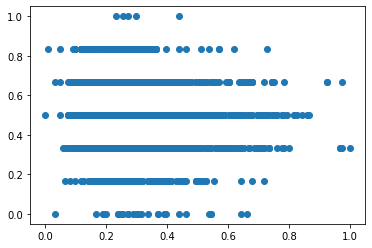

In [59]:
plt.scatter(df['fixed_acidity'], df['quality'])

-0.005110132030312853


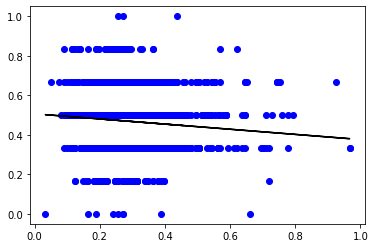

In [60]:
'''
Linear regression between fixed_acidity and quality
'''

X = np.array(df['fixed_acidity']).reshape(-1, 1)
y = np.array(df['quality']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression().fit(X_train, y_train)

print(regr.score(X_test, y_test))

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [61]:
'''
Baseline model
'''

X = df[cols].drop(['quality'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

y_train_pred = np.full(y_train.shape, np.mean(y_train))

r2 = r2_score(y_train, y_train_pred)

print(r2)


0.0


In [112]:
'''
Multivariate linear regression (no regularization)
'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

regr = LinearRegression()

regr.fit(X_train, y_train)

y_train_pred = cross_val_predict(regr, X_train, y_train, cv=10)

r2 = r2_score(y_train, y_train_pred)

print("train = ", r2)

y_test_pred = regr.predict(X_test)

r2_pred = r2_score(y_test, y_test_pred)

print("test = ", r2_pred)

train =  0.2916268177929674
test =  0.29161893435988484


In [113]:
'''
Multivariate linear regression (L2 regularization)
'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

ridge_params = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]}

model = GridSearchCV(Ridge(), param_grid = ridge_params)

print(model.fit(X_train, y_train).best_estimator_)

y_train_pred = cross_val_predict(model.best_estimator_, X_train, y_train, cv=10)

r2 = r2_score(y_train, y_train_pred)

print("train = ", r2)


y_test_pred = model.best_estimator_.predict(X_test)

r2_pred = r2_score(y_test, y_test_pred)

print("test = ", r2_pred)


Ridge(alpha=0.1)
train =  0.2917700285408955
test =  0.28802676564334007


In [115]:
'''
Multivariate nonlinear regression (L2 regularization)
'''

# used a for loop to find best degree

polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.25)

ridge_params = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]}


model = GridSearchCV(Ridge(), param_grid = ridge_params)

print(model.fit(X_train, y_train).best_estimator_)

y_train_pred = cross_val_predict(model.best_estimator_, X_train, y_train, cv=5)

r2 = r2_score(y_train, y_train_pred)

print("train = ", r2)


y_test_pred = model.best_estimator_.predict(X_test)

r2_pred = r2_score(y_test, y_test_pred)

print("test = ", r2_pred)

Ridge(alpha=0.01)
train =  0.3210311893559741
test =  0.3765794560506859


In [116]:
'''
Multivariate nonlinear regression (L1 regularization)
'''

# used a for loop to find best degree

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2)

lasso_params = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]}

model = GridSearchCV(Lasso(tol=0.1), param_grid = lasso_params)

print(model.fit(X_train, y_train).best_estimator_)

y_train_pred = cross_val_predict(model.best_estimator_, X_train, y_train, cv=10)

r2 = r2_score(y_train, y_train_pred)
print("train = ", r2)


y_test_pred = model.best_estimator_.predict(X_test)

r2_pred = r2_score(y_test, y_test_pred)

print("test = ", r2_pred)


Lasso(alpha=1e-05, tol=0.1)
train =  0.2955121670995766
test =  0.34607270128016765
